In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [56]:
ds = pd.read_csv('./movies_prerelease.csv')

In [57]:
ds

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,"rat_(0, 2]","rat_(2, 4]","rat_(4, 6]",...,s_Zakir Hussain,s_Zareen Khan,s_Zarina Wahab,s_Zayed Khan,s_Zeenat Aman,s_Zenia Starr,s_Zenobia Shroff,s_Zohra Sehgal,s_Zoya Afroz,s_Zoya Hussain
0,Batti Gul Meter Chalu,2,50.0,37.00,6.3,1552,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,6,90.0,370.00,8.5,105480,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manmarziyaan,3,30.0,26.00,7.0,1836,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sui Dhaaga: Made in India,5,50.0,79.00,6.9,1342,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stree,6,25.0,127.00,8.3,7801,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Manto,2,8.0,3.50,7.9,622,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pataakha,2,20.0,6.50,7.7,392,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 Idiots,6,55.0,202.00,8.4,282358,2009,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PK,6,85.0,340.00,8.2,127703,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Padman,5,40.0,81.00,8.1,10917,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
ds['Target'] = ds['Target'].map({1:1, 2:1, 3:1, 4:2, 5:3, 6:3}).astype(int)
data = ds.drop(columns=['Movie', 'Budget', 'BoxOffice', 'Rating', 'Votes', 'Year', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]']).values
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values
print(data.shape)

(986, 1796)


In [59]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
np.unique(ds.Target)

array([1, 2, 3])

In [61]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
## 70-30 Split randomized
split = int(0.7*data.shape[0])
np.random.shuffle(data)
X_train = data[:split, 1:]
Y_train = data[:split, 0]

X_test = data[split:, 1:]
Y_test = data[split:, 0]

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(690, 1795) (690,)
(296, 1795) (296,)


0.4864864864864865


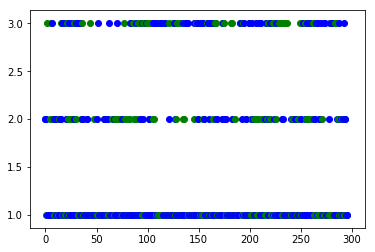

Normalized confusion matrix
[[0.62721893 0.18934911 0.18343195]
 [0.49090909 0.25454545 0.25454545]
 [0.375      0.29166667 0.33333333]]


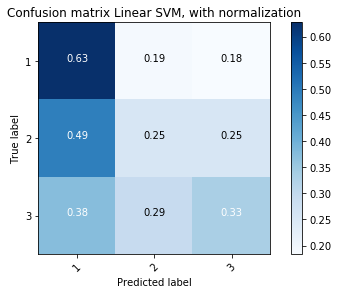

In [63]:
from sklearn.externals import joblib
svm_model_linear = svm.SVC(kernel = 'linear', C = 1).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, Y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

for ix in range(svm_predictions.shape[0]):
    plt.scatter(ix, svm_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3], normalize=True, title='Confusion matrix Linear SVM, with normalization')

pickle.dump(svm_model_linear, open('full_svm.pkl', 'wb'))

0.3614864864864865


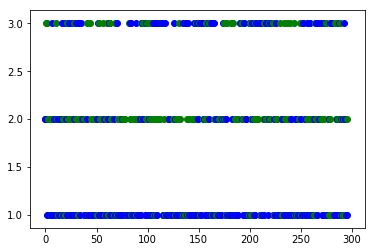

Normalized confusion matrix
[[0.39053254 0.3964497  0.21301775]
 [0.36363636 0.43636364 0.2       ]
 [0.25       0.51388889 0.23611111]]


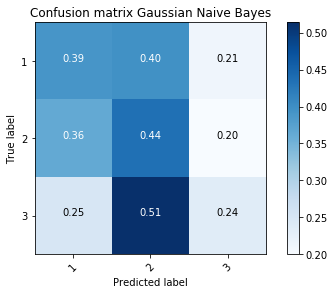

In [64]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy for X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)

for ix in range(gnb_predictions.shape[0]):
    plt.scatter(ix, gnb_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3], normalize=True, title='Confusion matrix Gaussian Naive Bayes')

pickle.dump(gnb, open('full_naivebayes.pkl', 'wb'))

0.5101351351351351


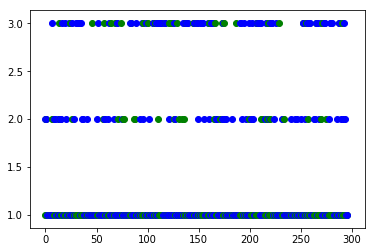

Normalized confusion matrix
[[0.79881657 0.0887574  0.11242604]
 [0.85454545 0.03636364 0.10909091]
 [0.66666667 0.13888889 0.19444444]]


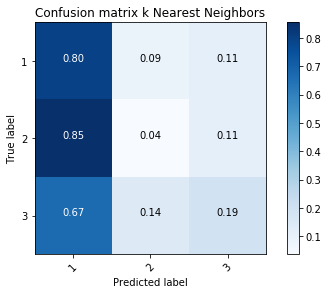

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

for ix in range(knn_predictions.shape[0]):
    plt.scatter(ix, knn_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3], normalize=True, title='Confusion matrix k Nearest Neighbors')

pickle.dump(knn, open('full_knn.pkl', 'wb'))

0.5202702702702703


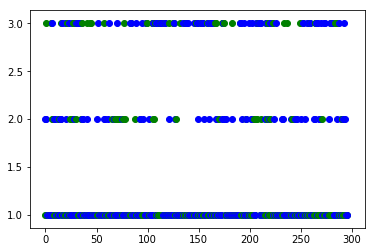

Normalized confusion matrix
[[0.77514793 0.10059172 0.12426036]
 [0.70909091 0.05454545 0.23636364]
 [0.55555556 0.16666667 0.27777778]]


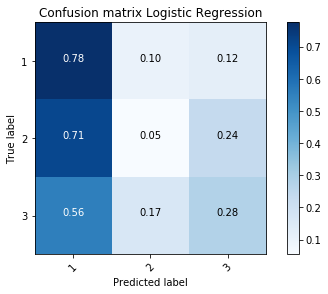

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = lr.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
lr_predictions = lr.predict(X_test) 
cm = confusion_matrix(Y_test, lr_predictions)

for ix in range(lr_predictions.shape[0]):
    plt.scatter(ix, lr_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3], normalize=True, title='Confusion matrix Logistic Regression')

pickle.dump(lr, open('full_logreg.pkl', 'wb'))

0.5743243243243243


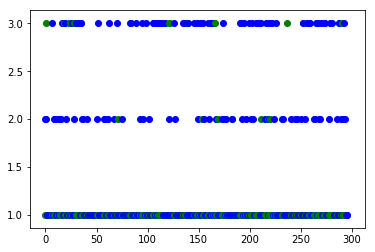

Normalized confusion matrix
[[0.94674556 0.01775148 0.03550296]
 [0.92727273 0.01818182 0.05454545]
 [0.83333333 0.04166667 0.125     ]]


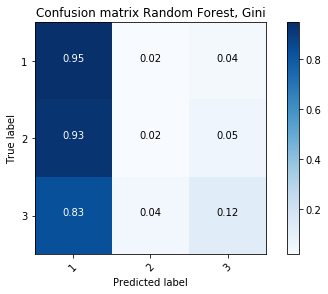

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3], normalize=True, title='Confusion matrix Random Forest, Gini')

pickle.dump(rf, open('full_randfor.pkl', 'wb'))

0.5709459459459459


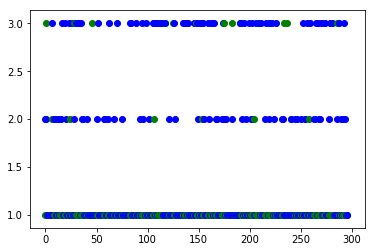

Normalized confusion matrix
[[0.95266272 0.01775148 0.0295858 ]
 [0.87272727 0.03636364 0.09090909]
 [0.86111111 0.05555556 0.08333333]]


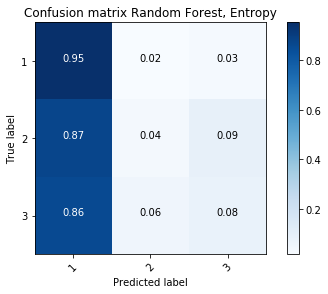

In [68]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3], normalize=True, title='Confusion matrix Random Forest, Entropy')

pickle.dump(rf, open('full_randfor2.pkl', 'wb'))

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
data2 = ds[['BoxOffice','Target','Budget','Year']]
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values
print(data2.shape)
data2 = data2.values

for x in range(data2.shape[0]):
    data2[x][0] = data2[x][0] + 26

(986, 4)


In [71]:
print(X_train.shape, Y_train.shape)
print(X_train[0].shape)

(690, 1795) (690,)
(1795,)


In [78]:
## 70-30 Split randomized
split = int(0.7*data2.shape[0])
np.random.shuffle(data2)
X_train2 = data2[:split, 1:]
Y_train2 = data2[:split, 0]

X_test2 = data2[split:, 1:]
Y_test2 = data2[split:, 0]

print (X_train2.shape, Y_train2.shape)
print (X_test2.shape, Y_test2.shape)

(690, 3) (690,)
(296, 3) (296,)


In [79]:
lm = LinearRegression()
lm.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
lm.score(X_test2, Y_test2)

0.7953783589044371

In [81]:
y_pred2 = lm.predict(X_test2)
print(y_pred2.shape)
for i in range(y_pred2.shape[0]):
    print(y_pred2[i], Y_test2[i])

(296,)
17.21049327480742 30.0
186.80969909801243 201.0
19.88386460694909 29.0
71.4180738846095 58.0
69.97266442280358 49.0
18.500036829594166 27.0
34.11630558047773 32.0
88.35658872839697 79.0
46.01221331481992 39.0
20.076689629512146 33.0
70.07120522279845 57.0
22.450181984242477 31.0
73.92706615487856 77.0
45.58109099929655 49.0
29.270780071022187 35.0
21.169151584309105 26.61
36.22687807334066 32.0
79.42541814875432 75.0
16.619248474838173 29.0
19.4854448295429 31.0
55.863386818176906 36.5
21.36197660687219 34.0
75.2123531322386 61.0
14.250012697534544 27.0
10.788314965433898 27.0
170.6964697697278 178.0
34.35034629601137 31.0
22.844345184221964 35.0
48.74716633141256 35.6
60.606114950210895 39.0
35.007429357858285 43.0
77.21204827846988 55.0
19.781067229527537 32.0
291.08948639960556 306.0
39.09307442804533 35.0
104.37127725668672 119.0
69.08154064542302 51.0
84.85793188075247 81.0
18.401496029599286 27.0
32.92955940311256 42.0
186.80969909801243 368.0
76.6947217095884 57.0
26.4045

In [82]:
pickle.dump(lm, open('full_lm.pkl', 'wb'))

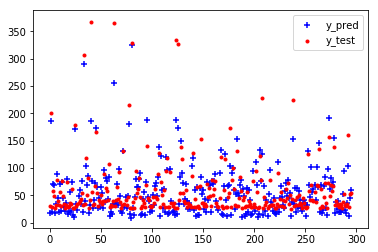

In [84]:
y = range(y_pred.shape[0])
plt.scatter(y, y_pred2, c='b', marker='+')
plt.scatter(y, Y_test2, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)

In [65]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [83]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape, y_train.shape)

(690,) (690, 7)


In [84]:
model = Sequential()
model.add(Dense(800, input_shape=(1796,)))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 800)               1437600   
_________________________________________________________________
activation_17 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               160200    
_________________________________________________________________
activation_18 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_19 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 357       
__________

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 690 samples, validate on 296 samples
Epoch 1/50
690/690 [==============================] - 7s 10ms/step - loss: 1.9040 - acc: 0.2652 - val_loss: 1.7572 - val_acc: 0.3311
Epoch 2/50
690/690 [==============================] - 4s 5ms/step - loss: 1.6124 - acc: 0.3362 - val_loss: 1.7422 - val_acc: 0.3041
Epoch 3/50
690/690 [==============================] - 3s 5ms/step - loss: 1.2681 - acc: 0.5377 - val_loss: 1.7931 - val_acc: 0.3547
Epoch 4/50
690/690 [==============================] - 3s 5ms/step - loss: 0.8620 - acc: 0.7087 - val_loss: 2.0086 - val_acc: 0.2736
Epoch 5/50
690/690 [==============================] - 3s 5ms/step - loss: 0.5477 - acc: 0.8377 - val_loss: 2.4981 - val_acc: 0.2736
Epoch 6/50
690/690 [==============================] - 3s 5ms/step - loss: 0.3632 - acc: 0.8928 - val_loss: 2.7191 - val_acc: 0.2365
Epoch 7/50
690/690 [==============================] - 3s 5ms/step - loss: 0.2139 - acc: 0.9304 - val_loss: 3.2339 - val_acc: 0.2534
Epoch 8/50
690/690 [=========

In [25]:
final_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_rating, df_genre, df_year, df_runtime, df_dir, df_star], axis=1)

In [29]:
final_df.to_csv('movies_prerelease_full.csv', encoding='utf-8', index=False)

In [31]:
year_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_year], axis=1)
year_df.to_csv('movies_prerelease_year.csv', encoding='utf-8', index=False)

In [34]:
genre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_genre], axis=1)
genre_df.to_csv('movies_prerelease_genre.csv', encoding='utf-8', index=False)

In [35]:
yeargenre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, year, df_year, df_genre], axis=1)
yeargenre_df.to_csv('movies_prerelease_yeargenre.csv', encoding='utf-8', index=False)

In [36]:
final2_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_dir, df_star], axis=1)
final2_df.to_csv('movies_prerelease_fullcast.csv', encoding='utf-8', index=False)